In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from scipy import stats
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
train = pd.read_csv("../1_House_Price_Project_X/train.csv")
test = pd.read_csv("../1_House_Price_Project_X/test.csv")

## 1.EDA

### 1) Introduction

In [3]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [4]:
train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [5]:
test.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In [6]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
print(len(train.columns), train.columns)

81 Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDr

In [8]:
print(len(test.columns), test.columns)

80 Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDr

In [9]:
numberic_features = []
catergoric_features = []
for f in train.columns:
    if train.dtypes[f] != 'object':
        numberic_features.append(f)
    else:
        catergoric_features.append(f)

In [10]:
print(len(numberic_features), numberic_features)
print(len(catergoric_features), catergoric_features)

38 ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
43 ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish',

In [11]:
numberic_features.remove("Id")
numberic_features.remove("SalePrice")
len(numberic_features), numberic_features

(36,
 ['MSSubClass',
  'LotFrontage',
  'LotArea',
  'OverallQual',
  'OverallCond',
  'YearBuilt',
  'YearRemodAdd',
  'MasVnrArea',
  'BsmtFinSF1',
  'BsmtFinSF2',
  'BsmtUnfSF',
  'TotalBsmtSF',
  '1stFlrSF',
  '2ndFlrSF',
  'LowQualFinSF',
  'GrLivArea',
  'BsmtFullBath',
  'BsmtHalfBath',
  'FullBath',
  'HalfBath',
  'BedroomAbvGr',
  'KitchenAbvGr',
  'TotRmsAbvGrd',
  'Fireplaces',
  'GarageYrBlt',
  'GarageCars',
  'GarageArea',
  'WoodDeckSF',
  'OpenPorchSF',
  'EnclosedPorch',
  '3SsnPorch',
  'ScreenPorch',
  'PoolArea',
  'MiscVal',
  'MoSold',
  'YrSold'])

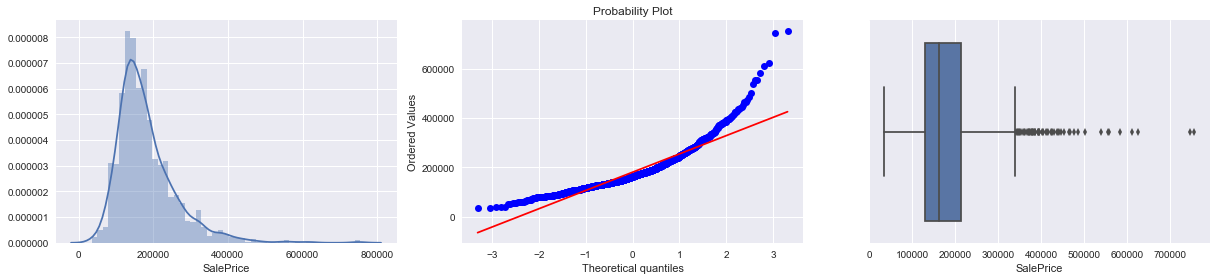

In [12]:
plt.figure(figsize=(17,4))

plt.subplot(131)
train["SalePrice"].describe()
sns.distplot(train["SalePrice"])

plt.subplot(132)
stats.probplot(train["SalePrice"], plot=plt)

plt.subplot(133)
sns.boxplot(train["SalePrice"])
plt.tight_layout()
plt.show()

In [13]:
def detect_outliers(data, feature):
    outlier_list = []
    
    Q1 = np.percentile(data[feature], 25)
    Q3 = np.percentile(data[feature], 75)
    IQR = Q3 - Q1
        
    outlier_lenth = 1.5 * IQR
        
    outliers = data[(data[feature] < Q1 - outlier_lenth) | (data[feature] > Q3 + outlier_lenth)].index
    
    outlier_list.append(outliers)

    return outlier_list   #카운트 몇개인지?

In [14]:
saleprice_outlier = detect_outliers(train, "SalePrice")
saleprice_outlier

[Int64Index([  11,   53,   58,  112,  151,  161,  178,  185,  224,  231,  278,
              309,  313,  320,  321,  336,  349,  378,  389,  440,  473,  477,
              481,  496,  515,  527,  585,  591,  608,  642,  644,  654,  661,
              664,  678,  688,  691,  702,  718,  769,  774,  798,  803,  825,
              877,  898,  987,  990, 1046, 1142, 1169, 1181, 1182, 1228, 1243,
             1267, 1268, 1353, 1373, 1388, 1437],
            dtype='int64')]

### 2) 변수들 간의 관계

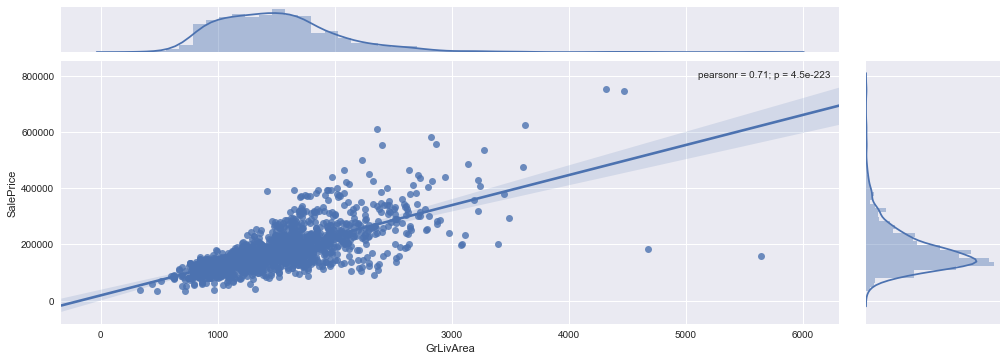

In [15]:
grid = sns.jointplot(x = "GrLivArea", y = "SalePrice", data=train, kind="reg")
grid.fig.set_size_inches(15,5)
plt.show()

In [16]:
df_train = train.copy()
df_train["2ndFloor"] = "2ndFloor"
df_train["2ndFloor"].loc[df_train["2ndFlrSF"]==0] = "No 2ndFloor"
df_train["Basement"] = "Basement"
df_train["Basement"].loc[df_train["TotalBsmtSF"]==0] = "No Basement"

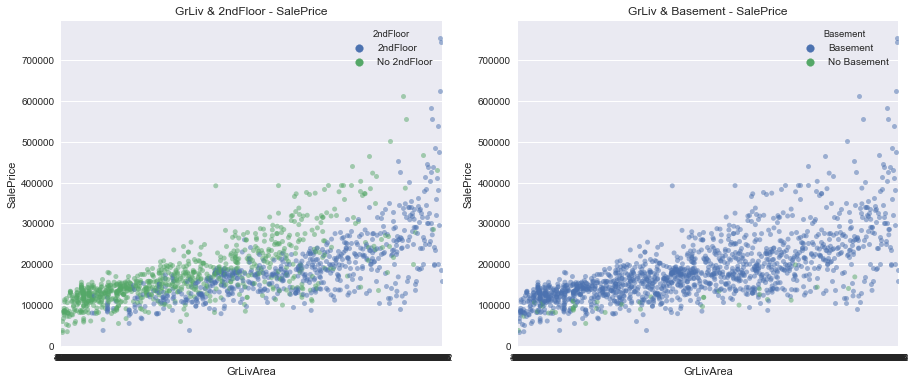

In [17]:
plt.figure(figsize=(15,6))
plt.subplot(121)
g = sns.stripplot(x = 'GrLivArea', y = 'SalePrice', hue="2ndFloor", data = df_train, alpha = 0.5)
g.set_xlabel('GrLivArea')
g.set_ylabel('SalePrice')
g.set_title('GrLiv & 2ndFloor - SalePrice')
# g.set_xticklabels(rotation=45)

plt.subplot(122)
b = sns.stripplot(x = 'GrLivArea', y = 'SalePrice', hue="Basement", data = df_train, alpha = 0.5)
b.set_xlabel('GrLivArea')
b.set_ylabel('SalePrice')
b.set_title('GrLiv & Basement - SalePrice')
# b.set_xticklabels(rotation=45)

plt.show()

Find : 1. Grliv 넓이가 중간 아래부분까지는 같은 넓이의 집은 2층보다 1층집의 값 더 비싼것을 알수 있었다
       2. 베이스먼트가 없는집은 거의 없으며, 집값에는 영향이 없는것 같다 

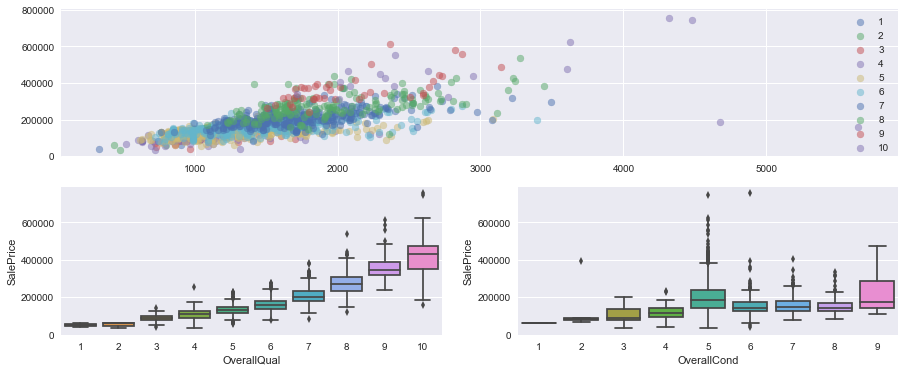

In [18]:
plt.figure(figsize=(15,6))

ax1 = plt.subplot2grid((2,2), (0,0), colspan = 2)
for qual in range(1,10+1):
    index = train.OverallQual == qual
    ax1.scatter( train.GrLivArea.loc[index], train.SalePrice.loc[index], data=train, label= qual, alpha =0.5)
ax1.legend()

ax2 = plt.subplot2grid((2,2), (1,0))
sns.boxplot(x = "OverallQual", y = "SalePrice", data=train, ax= ax2)

ax3 = plt.subplot2grid((2,2), (1,1))
sns.boxplot(x = "OverallCond", y = "SalePrice", data=train, ax= ax3)


Find : 1. 품질과 집값은 선형관계를 발견할 수 있으나 overall condition과 집값은 관계가 없는것을 발견할 수 있었음

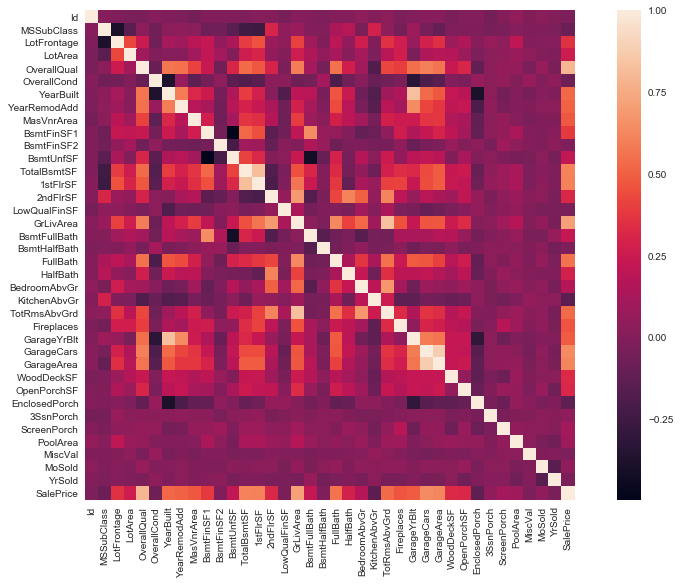

In [19]:
corrmat = train.corr()

f, ax = plt.subplots(figsize= (15,9))
sns.heatmap(corrmat, vmax = 1, square=True)

In [20]:
cols = corrmat.nlargest(30, 'SalePrice')['SalePrice'].index
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1',
       'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'HalfBath',
       'LotArea', 'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr', 'ScreenPorch',
       'PoolArea', 'MoSold', '3SsnPorch', 'BsmtFinSF2', 'BsmtHalfBath'],
      dtype='object')

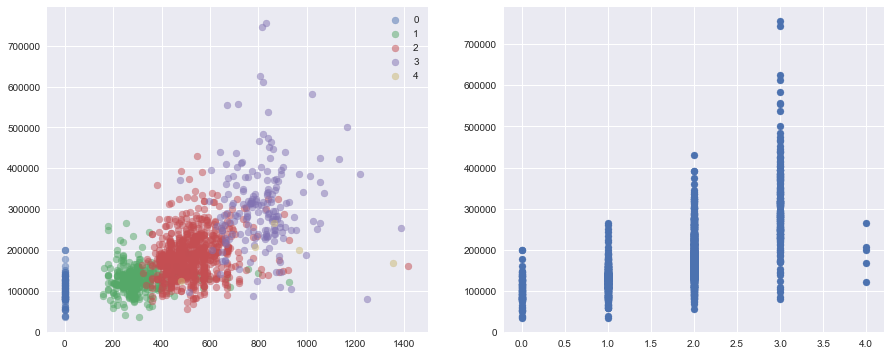

In [21]:
plt.figure(figsize=(15,6))

ax1 = plt.subplot(1,2,1)
for car in range(0,5):
    index = train.GarageCars == car
    ax1.scatter(train.GarageArea.loc[index], train.SalePrice.loc[index], data=train, label= car, alpha =0.5)
ax1.legend()


ax2 = plt.subplot(1,2,2)
ax2.scatter(x = "GarageCars", y = "SalePrice", data=train)

plt.show()

#맨 마지막 그래프 삭제

['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',  
       'TotalBsmtSF', '1stFlrSF', 'BsmtFinSF1',  
       'FullBath',        'HalfBath''BsmtFullBath' 'BsmtHalfBath'  
       'TotRmsAbvGrd', 'BedroomAbvGr'  
       'YearBuilt','YearRemodAdd', 'GarageYrBlt',   
       'MasVnrArea',   
       'Fireplaces',   
       'LotFrontage', 'LotArea'  
       'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF','BsmtUnfSF', 'BsmtFinSF2'  
,      'ScreenPorch' '3SsnPorch'  
       'PoolArea',   
       'MoSold',]
      dtype='object')

Bath - 명학 
Room - 명학
Year - 아라
이웃 - 이것저것 넣어볼께요 : 상위, 하위 = 기성환
fireplace - 아라

### Neighborhood

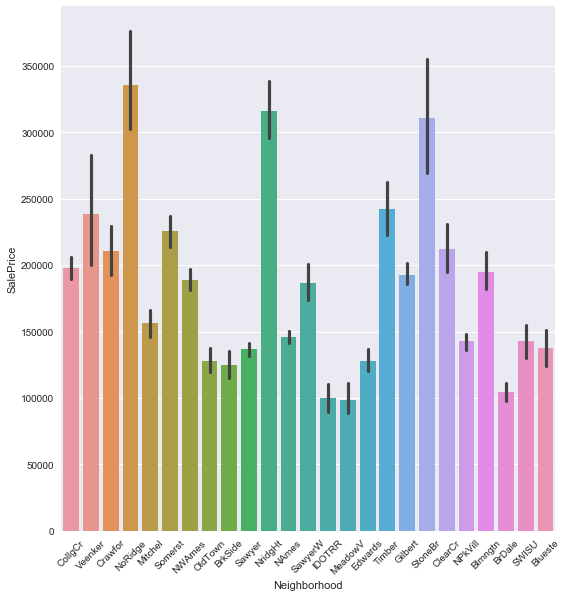

In [22]:
plt.figure(figsize = (8, 12))
g = sns.factorplot(x = "Neighborhood", y="SalePrice", data=df_train, size =8, kind="bar")
g.set_xticklabels(rotation=45)
plt.show()

### Year

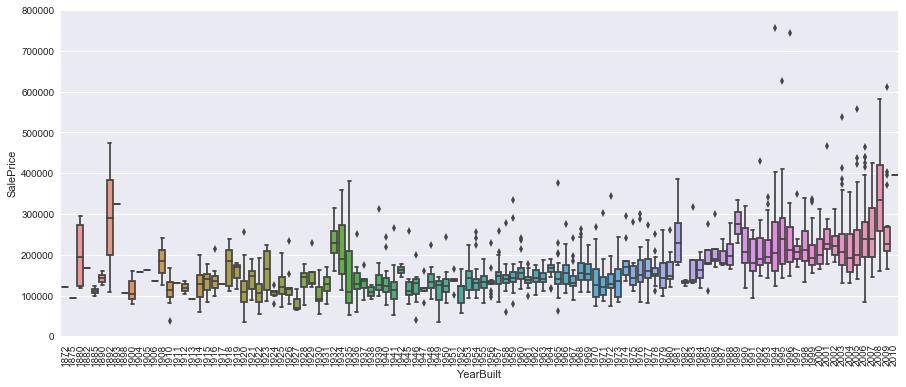

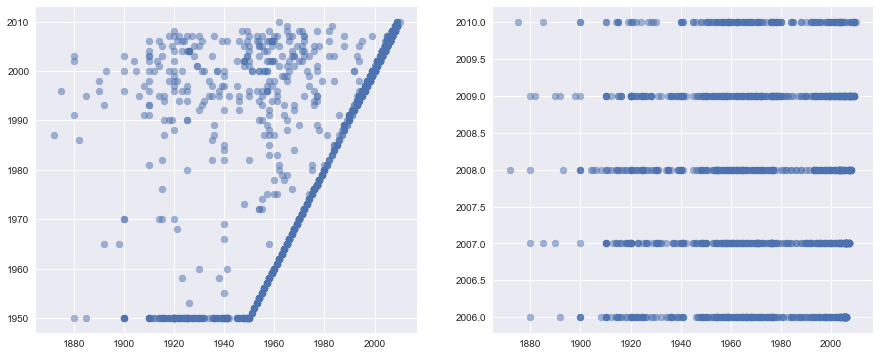

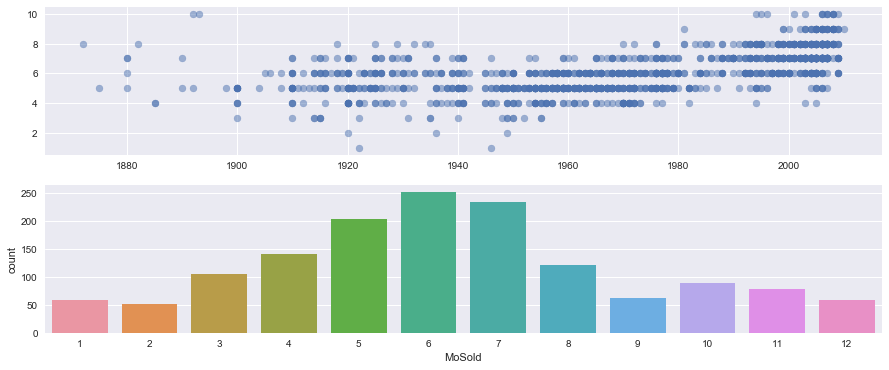

In [25]:
plt.figure(figsize=(15,6))
fig = sns.boxplot(x="YearBuilt", y="SalePrice", data=train)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(15,6))
ax2 = plt.subplot(1,2,1)
ax2.scatter(x = train['YearBuilt'], y = train['YearRemodAdd'], alpha = 0.5)
ax3 = plt.subplot(1,2,2)
ax3.scatter(x = train['YearBuilt'], y = train['YrSold'], alpha = 0.5)
plt.show()

plt.figure(figsize=(15,6))
ax4 = plt.subplot2grid((2,2), (0,0), colspan = 2)
ax4.scatter(x = train['YearBuilt'], y = train['OverallQual'], alpha = 0.5)
ax5 = plt.subplot2grid((2,2), (1,0), colspan = 2)
sns.countplot(x = "MoSold", data=train, ax = ax5)
plt.show()

Find

1.

### Fireplace

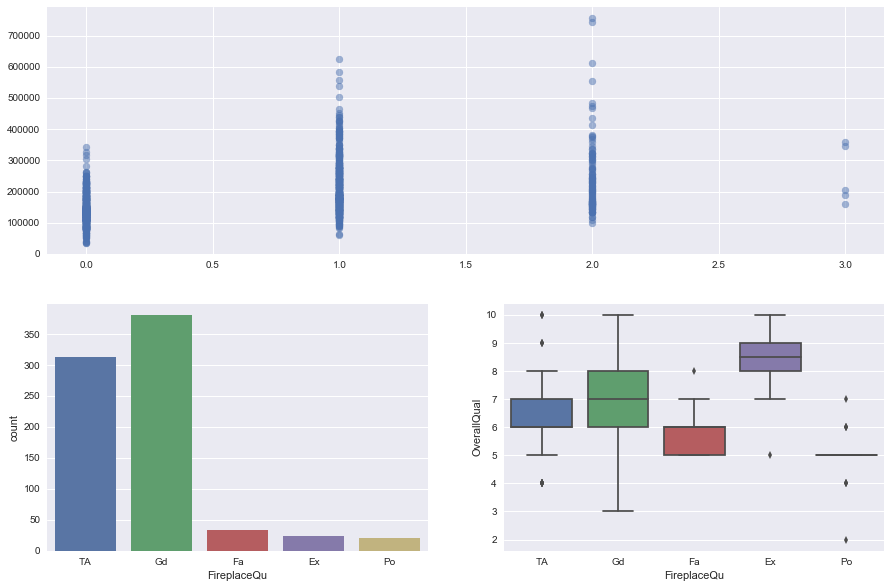

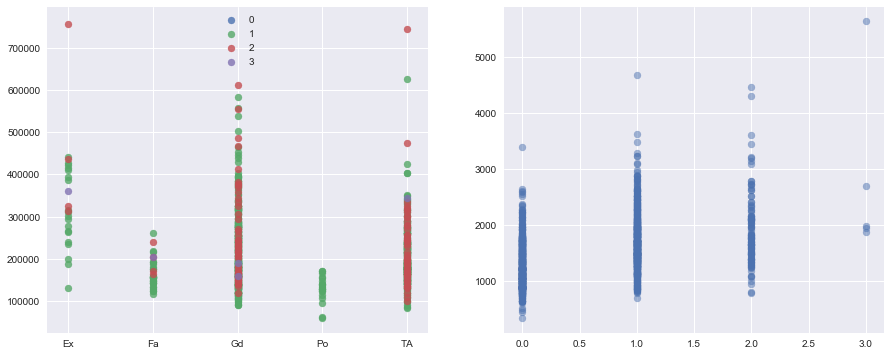

In [26]:
plt.figure(figsize=(15,10))
ax1 = plt.subplot2grid((2,2), (0,0), colspan = 2)
ax1.scatter(x = train['Fireplaces'], y = train['SalePrice'], alpha = 0.5)

ax2 = plt.subplot2grid((2,2), (1,0))
sns.countplot(x = "FireplaceQu", data=train, ax = ax2)

ax3 = plt.subplot2grid((2,2), (1,1))
sns.boxplot(x = 'FireplaceQu', y = 'OverallQual', data = train, ax=ax3)
plt.show()

plt.figure(figsize=(15,6))
ax4 = plt.subplot(1,2,1)
for Qu in range(0,4):
    index = train.Fireplaces == Qu
    ax4.scatter(train.FireplaceQu.loc[index], train.SalePrice.loc[index], data=train, label= Qu, alpha =0.8)
ax4.legend()

ax5 = plt.subplot(1,2,2)
ax5.scatter(x = train['Fireplaces'], y = train['GrLivArea'], alpha = 0.5)
plt.show()

Find

1.